 Solve the ODE below by newton-linearization scheme
 
 $y'' - (y')^2 - y^2 + y + 1 = 0 $ 
 
 

In [10]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [11]:
def get_a(x, h):
	return 1/(h**2) - 1/(4.0 * h**2)
def get_b(x, h):
	return - 2/(h**2) + B(x)
def get_c(x, h):
	return 1/(h**2) + A(x)/(2.0 * h)

In [31]:
epsilon = 0.00001
def ThomasAlgorithm(a, b, c, d, n):
    c_dash = np.zeros(n-1)
    d_dash = np.zeros(n-1)
    c_dash[0] = c[0]/b[0]
    d_dash[0] = d[0]/b[0]
    for itr in range(1, n-1):
        c_dash[itr] = c[itr] / (b[itr] - a[itr] * c_dash[itr-1])
        d_dash[itr] = (d[itr] - a[itr]*d_dash[itr-1]) / (b[itr] - a[itr] * c_dash[itr-1])
    
    y = np.zeros(n-1)
    y[n-2] = d_dash[n-2]
    
    for itr in reversed(range(n-2)):
        y[itr] = d_dash[itr] - c_dash[itr] * y[itr+1]
    
    return y



In [80]:
x0 = 0
xn = np.pi
y0 = 0.5 
yn = -0.5
def func(x0, xn, h = 0.1):
    lst = np.arange(x0, xn, h)
#     lst = np.append(lst, xn)
    return lst

def BVP(x0, xn, y0, yn, step, epsilon = 0.0001):
    '''Keeping the initialization y = 0.5cos(x) '''
    x = func(x0, xn, step)
#     y = 0.5*(np.cos(func(x0, xn, step)))
    y = np.linspace(y0, yn, x.shape[0])
    print(y.shape)
    a = [1/step**2 - 2*(y[i+1] - y[i-1])/(4*step**2)for i in range(1, len(y)-1)]
    b = [-2/step**2 + -2*y[i] + 1 for i in range(1, len(y)-1)]
    c = [1/step**2 + 2*(y[i+1] - y[i-1]) for i in range(1, len(y) -1)]
    d = [-(y[i]**2 - y[i] - 1 + (y[i+1] -y[i-1])**2/(4*step**2) - (y[i-1] - 2*y[i] + y[i+1])/(step**2)) for i in range(1, len(y)-1)]
    delta_y = np.ones(y.shape)
    while(np.amax(np.absolute(delta_y))>epsilon):
        a = [1/step**2 + 2*(y[i+1] - y[i-1])/(4*step**2)for i in range(1, len(y)-1)]
        b = [-2/step**2 + -2*y[i] + 1 for i in range(1, len(y)-1)]
        c = [1/step**2 - 2*(y[i+1] - y[i-1]) for i in range(1, len(y) -1)]
        d = [y[i]**2 - y[i] - 1 + (y[i+1] -y[i-1])**2/(4*step**2) - (y[i-1] - 2*y[i] + y[i+1])/(step**2) for i in range(1, len(y)-1)]
        delta_y = ThomasAlgorithm(a, b, c, d, len(y)-1)
        delta_y = np.insert(delta_y, 0, 0)
        delta_y = np.append(delta_y, 0)
        print(delta_y)
        y = y + delta_y
        
    return y

y_new = BVP(x0, xn, y0, yn, step=0.25, epsilon = 0.01)
print(y_new)
# 

(13,)
[0.         0.33319054 0.58007885 0.75742395 0.87395769 0.93351094
 0.93741431 0.88649761 0.78283604 0.63125892 0.44053549 0.22408171
 0.        ]
[ 0.         -0.06162596 -0.07420484 -0.06612572 -0.05558024 -0.05139496
 -0.05579502 -0.06688231 -0.08008643 -0.08874711 -0.08443496 -0.0577271
  0.        ]
[ 0.          0.008355    0.00732728 -0.00050049 -0.01138921 -0.02296598
 -0.03370756 -0.04187522 -0.04508127 -0.04094917 -0.02886114 -0.01222735
  0.        ]
[ 0.         -0.00298061 -0.00531484 -0.0077773  -0.01104119 -0.01502912
 -0.01878245 -0.02081236 -0.01983168 -0.01563006 -0.00955246 -0.00389096
  0.        ]
[ 0.          0.00012486 -0.00044948 -0.00181704 -0.00382811 -0.00605013
 -0.00780591 -0.00841712 -0.00758695 -0.0056361  -0.00332146 -0.00133434
  0.        ]
[ 0.5         0.69373051  0.84077031  0.9312034   0.95878562  0.92140409
  0.82132338  0.66517727  0.46358304  0.23029648 -0.01896787 -0.2677647
 -0.5       ]


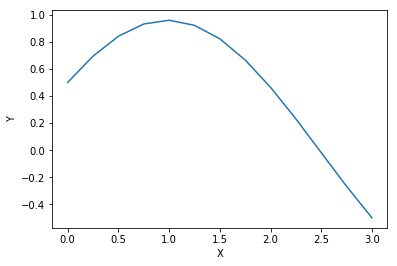

In [81]:
x = func(x0, xn, 0.25)
plt.xlabel('X')
plt.ylabel('Y')
plt.plot(x, y_new, '-')